# Programming in Python
## Exam: June 21, 2021


You can solve the exercises below by using standard Python 3.9 libraries, NumPy, Matplotlib, Pandas, PyMC3.
You can browse the documentation: [Python](https://docs.python.org/3.9/), [NumPy](https://numpy.org/doc/stable/user/index.html), [Matplotlib](https://matplotlib.org/stable/contents.html), [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html), [PyMC3](https://docs.pymc.io/).
You can also look at the [slides of the course](https://homes.di.unimi.it/monga/lucidi2021/pyqb00.pdf) or your code on [GitHub](https://github.com).

**It is forbidden to communicate with others.** 


In [47]:
import numpy as np              # type: ignore
import matplotlib.pyplot as plt # type: ignore
%matplotlib inline

In [48]:
import pandas as pd     

### Exercise 1 (max 2 points)

A recent exploration of Venus has discovered a new organism, now known as *Sarchiapus Examinis*. The data collected about *Sarchiapi E.* individuals are available in the file `data.csv`. For each individual the DNA, an age in days, and a length in centimeters were recorded. 

Read the data in a Pandas DataFrame.


In [49]:
dna = pd.read_csv('data.csv') #import

In [50]:
dna

,Unnamed: 0,dna,age,length
0,0,GACCTCCTCTGTACGGAGCAAGACCTGTCTCCGCTCAGACTGAGGG...,30,3.99
1,1,AGGCCCGGTTCGCTAGTCTCAGTCTCCGGGACTGGAAAGCATGTCT...,21,3.12
2,2,TAAGGGAATCGACATTAAGCGTTGGTCTATAAATCCGAAATTTGTA...,24,3.36
3,3,GCCTCCGTCTGTCCAGTACCTCTTCGAACCCATCGCAAGAGGTCGG...,20,3.93
4,4,CGCAAAATCGGTTCAAGTCAAGAATCTTGAAGTGACGACGATGGAG...,20,7.18
...,...,...,...,...
995,995,CCGTCAAGTGGGTCTCTTTAGAATACATTCCCTTTCCCTGGTTTCC...,27,4.25
996,996,GCGCAGTCGGAACCTATCGATCTCATAACCGCGGCGCTAAACCCCG...,29,9.50
997,997,GAACCAACTTGGCCCCATAGCGCGAACTCTTCTCACGTTGCGAGAT...,26,8.15
998,998,AGAGTGCCGCAGCCGTGGTGATACTCTGATGAGCCGAAATATAAAC...,25,4.82


### Exercise 2 (max 3 points)

Plot the distribution of length.

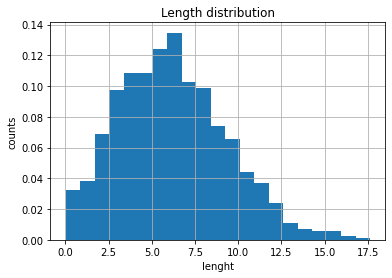

In [51]:
#plot
fig,ax=plt.subplots()
_=ax.hist(dna['length'], label='Young', density=True, bins='auto')
_=ax.set_title('Length distribution')
_=ax.set_xlabel('lenght')
_=ax.set_ylabel('counts')
_=ax.grid()

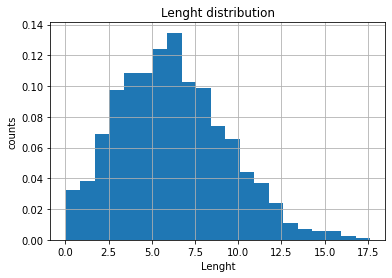

In [52]:
fig, ax = plt.subplots()
_=ax.hist(dna['length'], density=True, label='Length', bins='auto')
_=ax.set_xlabel('Lenght')
_=ax.set_ylabel('counts')
_=ax.set_title('Lenght distribution')
_=ax.grid()

### Exercise 3 (max 5 points)

Collect in a new Pandas DataFrame the mean and standard deviation of length for each age.

In [53]:
#insert in a new data frame 
group=dna.groupby(['age'])
group

In [54]:
group=dna.groupby(['age'])
group['length'].agg(['mean','std','max',])

,mean,std,max
age,,,
20,6.183011,3.033944,14.44
21,6.123152,3.046807,17.63
22,6.895889,3.431232,16.08
23,6.496957,3.537096,16.79
24,6.371400,3.447384,15.26
25,6.092796,2.820211,13.85
26,6.100777,3.450832,15.54
27,5.965275,3.031757,13.96
28,6.042614,3.076516,15.19


### Exercise 4 (max 5 points)

The gender of a *Sarchiapus E.* individual is defined by the first letter of its DNA: an `'A'` or a `'C'` is considered a male, otherwise is considered a female. Add a column to the data with the gender.

In [55]:
#male or female
def gender(dna)-> str:
    if (dna['dna'][0] == 'A')| (dna['dna'][0] == 'C'):
        gender = 'male'
    else:
        gender = 'female'
    return gender

In [62]:
#chiamare funzione in nuova colonna 
dna['gender'] = dna.apply (gender,axis=1)
dna

### Exercise 5 (max 3 points)

Plot the distribution of length for male *Sarchiapi E.*.


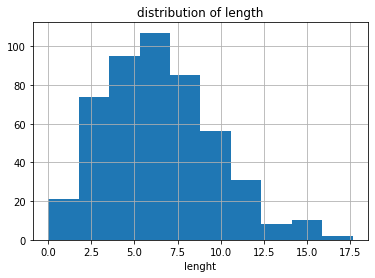

In [20]:
fig,ax=plt.subplots()
length_m = dna.loc[dna['gender'] =='male']['length']
_=ax.hist(length_m)
_=ax.set_title('distribution of length')
_=ax.set_xlabel('lenght')
_=ax.grid()

### Exercise 6 (max 7 points)


Define a function `count_twins` that takes a string and a character and returns how many times the substring composed by the character repeated twice can be found in the whole string. For example, if the string is `'ZXXZXXXZCCCX'`, and the character `'X'`, the result should be 3.

To get the full marks, you should declare correctly the type hints (the *signature* of the function) and add a doctest string. 

In [34]:
stringa='ZaXXZXXXZCCCX'
print(stringa[2:4])
carattere='X'

XX


In [35]:
def count_twins(stringa:str,carattere:str)->int:
    count=0
    for i in range(0,len(stringa)-1):
        if(stringa[i] == stringa[i+1] == carattere):
            count=count+1
    return count

In [36]:
count_twins(stringa,carattere)

3

### Exercise 7 (max 5 points)

Using the function defined in Exercise 5, add a column `a_twins` with the number of `'A'` twins in the DNA of each *Sarchiapus E.*.

In [38]:
#colonna=nomedata.apply( lambda comedata: funzione(), axis)
dna['a_twins']=dna.apply(lambda dna: count_twins(dna['dna'],'A'),axis=1)
dna

,Unnamed: 0,dna,age,length,gender,a_twins
0,0,GACCTCCTCTGTACGGAGCAAGACCTGTCTCCGCTCAGACTGAGGG...,30,3.99,female,4
1,1,AGGCCCGGTTCGCTAGTCTCAGTCTCCGGGACTGGAAAGCATGTCT...,21,3.12,male,5
2,2,TAAGGGAATCGACATTAAGCGTTGGTCTATAAATCCGAAATTTGTA...,24,3.36,female,8
3,3,GCCTCCGTCTGTCCAGTACCTCTTCGAACCCATCGCAAGAGGTCGG...,20,3.93,female,4
4,4,CGCAAAATCGGTTCAAGTCAAGAATCTTGAAGTGACGACGATGGAG...,20,7.18,male,10
...,...,...,...,...,...,...
995,995,CCGTCAAGTGGGTCTCTTTAGAATACATTCCCTTTCCCTGGTTTCC...,27,4.25,male,5
996,996,GCGCAGTCGGAACCTATCGATCTCATAACCGCGGCGCTAAACCCCG...,29,9.50,female,10
997,997,GAACCAACTTGGCCCCATAGCGCGAACTCTTCTCACGTTGCGAGAT...,26,8.15,female,8
998,998,AGAGTGCCGCAGCCGTGGTGATACTCTGATGAGCCGAAATATAAAC...,25,4.82,male,5


### Exercise 8 (max 3 points)

Consider the hypothesis that the length of each *Sarchiapus E.* is normally distributed with a mean equal to the number of `'A'` twins in its DNA and a standard deviation that you assume to be uniformed distributed between 0 and 10. Code this statistical hypothesis as a PyMC3 model and plot the distribution of the standard deviation after having seen the collected data.

In [39]:
import pymc3 as pm 

In [41]:
length_pm = pm.Model() 

with length_pm:
    
    mu=dna['a_twins']  #richiamo variabile, inizio, fine
    sigma=pm.Uniform('sigma',0,10)
    
    o = pm.Normal('length',mu, sigma, observed=dna['length']) 
    

In [42]:
with length_pm:
    posterior= pm.sample(return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


In [43]:
posterior[1]

{'sigma_interval__': -1.785220238430687, 'sigma': 1.4365973654464315}

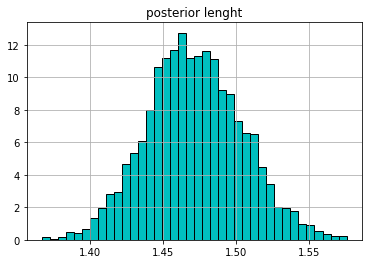

In [44]:
fig, ax =plt.subplots()
_=ax.hist(posterior['sigma'],bins='auto',density=True, color='c', ec='k')
_=ax.set_title('posterior lenght')
_=ax.grid()

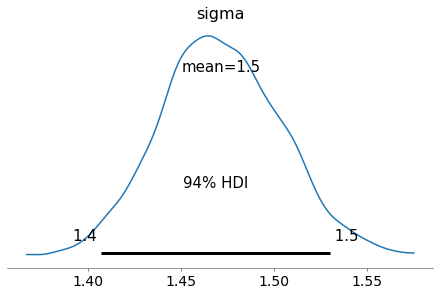

In [46]:
with length_pm:
    pm.plot_posterior(posterior)